In [30]:
#Importing all the libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from itertools import chain
from scipy import stats

from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.inspection import permutation_importance

import xgboost
from xgboost import XGBRegressor
# Load necessary packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import math
import lime
import sklearn
import sklearn.ensemble
import sklearn.metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
import shap
import datasets
import transformers
import captum
from captum.attr import Lime
from captum.attr import KernelShap
from captum._utils.models.linear_model import SkLearnLinearRegression, SkLearnLasso
from captum.attr._core.lime import get_exp_kernel_similarity_function
import pandas as pd
import torch
import torch.nn as nn
from scipy import stats
import pickle
from scipy.stats import spearmanr, pearsonr, rankdata
import itertools
from scipy.special import comb
import collections
import scipy
from scipy.stats import sem
import seaborn as sns
import matplotlib as matplotlib
from os import path
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch.optim as optim
from captum.attr import LayerConductance, LayerActivation, LayerIntegratedGradients
from captum.attr import IntegratedGradients, DeepLift, GradientShap, NoiseTunnel, FeatureAblation

In [31]:
# Importing the dataset
# Ensure the file path is correct. Update the path if the file is located elsewhere.
df = pd.read_csv(r"C:\Users\HUAWEI\OneDrive\Documents\JADS\Master\Interactive and Explainable AI\Group Assignment\Funda_dataset_cleaned 1.csv")

In [32]:
df.head()

,Aangeboden sinds,Verkoopdatum,Laatste vraagprijs,Status,Soort bouw,Aantal kamers,Energielabel,Overige inpandige ruimte m2,Perceel m2,Achtertuin m2,...,Soort garage_Parkeerkelder,Soort garage_Garagebox,Soort garage_Aangebouwdestenen garage,Soort garage_Carport,Soort garage_Vrijstaandestenen garage,Soort garage_Vrijstaandehouten garage,Soort garage_Garagemet carport,Soort garage_Souterrain,Soort dak,Soort woonhuis
0,2022-05-19,2023-03-10,485000,Verkocht,Nieuwbouw,5,A,18,263,120,...,0,0,0,0,0,0,0,0,Zadeldak bedekt met pannen,"Eengezinswoning, 2-onder-1-kapwoning"
1,2022-09-26,2023-06-22,375000,Verkocht,Nieuwbouw,5,A+++,0,198,60,...,0,0,0,0,0,0,0,0,Zadeldak bedekt met pannen,"Eengezinswoning, hoekwoning"
2,2023-01-25,2023-05-18,279500,Verkocht,Nieuwbouw,3,NaN,4,128,68,...,0,0,0,0,0,0,0,0,Lessenaardak bedekt met pannen,"Eengezinswoning, tussenwoning"
3,2022-12-02,2023-05-09,2330000,Verkocht,Nieuwbouw,8,NaN,0,2479,2172,...,0,0,0,0,0,0,0,0,Samengesteld dak bedekt met bitumineuze dakbed...,"Villa, vrijstaande woning"
4,2022-12-02,2023-05-15,2270000,Verkocht,Nieuwbouw,8,NaN,0,1796,1489,...,0,0,0,0,0,0,0,0,Samengesteld dak bedekt met bitumineuze dakbed...,"Villa, vrijstaande woning"


In [33]:
#We change everything that starts with 'A+' to A+ with the following line of code
df.loc[df['Energielabel'].str.startswith('A+', na=False), 'Energielabel'] = 'A+'
df['Energielabel'].value_counts()

Energielabel
C     2652
A     2384
B     1484
D     1081
E      612
A+     561
F      335
G      261
Name: count, dtype: int64

In [34]:
#We first create a dictionary that will map the ordinal values to the corresponding numerical values
map_elabel = {'G':0, 'F':1, 'E':2, 'D':3, 'C':4, 'B':5, 'A':6, 'A+':7, 'None':99}
df['Energielabel'] = df['Energielabel'].map(map_elabel)
df['Energielabel'].value_counts()

Energielabel
4.0    2652
6.0    2384
5.0    1484
3.0    1081
2.0     612
7.0     561
1.0     335
0.0     261
Name: count, dtype: int64

In [35]:
map_bouw = {'Bestaande bouw':0, 'Nieuwbouw':1}
df['Soort bouw'] = df['Soort bouw'].map(map_bouw)

In [36]:
#We split the data at the value of a space. Therefore the numerical amount will be kept and the string part will
#not be used further.
df['Aantal dagen tot verkoop'] = df['Aantal dagen tot verkoop'].str.split(' ').str[0]
df['Aantal dagen tot verkoop'].value_counts()

Aantal dagen tot verkoop
20     617
21     615
19     523
18     440
14     439
      ... 
244      1
216      1
161      1
204      1
295      1
Name: count, Length: 265, dtype: int64

In [37]:
df['House Type'] = df['Soort woonhuis'].str.split(', ').str[0]
df['House Subtype'] = df['Soort woonhuis'].str.split(', ').str[1]

print("Value Counts of House Type\n",df['House Type'].value_counts())
print("\nValue Counts of House Type\n",df['House Subtype'].value_counts())

Value Counts of House Type
 House Type
Eengezinswoning    8011
Villa               873
Herenhuis           496
Landhuis            232
Bungalow            182
Woonboerderij        82
Grachtenpand          6
Woonboot              1
Stacaravan            1
Name: count, dtype: int64

Value Counts of House Type
 House Subtype
tussenwoning                                            3028
vrijstaande woning                                      1771
2-onder-1-kapwoning                                     1417
hoekwoning                                               954
tussenwoning (hofjeswoning)                              651
geschakelde woning                                       585
hoekwoning (hofjeswoning)                                451
geschakelde 2-onder-1-kapwoning                          405
eindwoning                                               262
halfvrijstaande woning                                   141
vrijstaande woning (semi-bungalow)                        31
tusse

In [38]:
df['House Subtype'] = df['House Subtype'].str.rsplit(" (").str[0]
df['House Subtype'].value_counts()

House Subtype
tussenwoning                       3741
vrijstaande woning                 1825
2-onder-1-kapwoning                1439
hoekwoning                         1427
geschakelde woning                  621
geschakelde 2-onder-1-kapwoning     411
eindwoning                          268
halfvrijstaande woning              147
verspringend                          5
Name: count, dtype: int64

In [39]:
df["Bergruimte"]=df["Overige inpandige ruimte m2"] + \
                         df["Gebouwgebonden buitenruimte in m2"] + \
                         df["Externe bergruimte in m2"]
bergruimte_columns=["Overige inpandige ruimte m2","Gebouwgebonden buitenruimte in m2","Externe bergruimte in m2"]

df=df.drop(columns=bergruimte_columns)

In [40]:
categories = ['Soort garage','Balkon/dakterras','Schuur/berging', 'Tuin', 'Voorzieningen', 'Isolatie', 'Verwarming']

In [41]:
for i in categories:
    print('------------------------------------------------------')
    print(i)
    column_list = [col for col in df.columns if i in col]
    df['Sum_'+i] = df[column_list].sum(axis=1)
    df = df.drop(columns=column_list)
    display(df['Sum_'+i].value_counts())
    print('------------------------------------------------------')
    print('\n')

------------------------------------------------------
Soort garage


Sum_Soort garage
0    6237
1    3057
2     528
3      51
4       9
5       2
Name: count, dtype: int64

------------------------------------------------------


------------------------------------------------------
Balkon/dakterras


Sum_Balkon/dakterras
0    6779
1    2873
2     224
3       8
Name: count, dtype: int64

------------------------------------------------------


------------------------------------------------------
Schuur/berging


Sum_Schuur/berging
1    7575
0    2309
Name: count, dtype: int64

------------------------------------------------------


------------------------------------------------------
Tuin


Sum_Tuin
2    4045
1    2334
0    2182
3    1171
4     137
5      14
7       1
Name: count, dtype: int64

------------------------------------------------------


------------------------------------------------------
Voorzieningen


Sum_Voorzieningen
1     5182
2     1880
3     1181
4      658
0      505
5      318
6      108
7       38
8       13
10       1
Name: count, dtype: int64

------------------------------------------------------


------------------------------------------------------
Isolatie


Sum_Isolatie
1     4457
2     1797
4     1419
3     1253
5      750
6      141
0       46
9       10
7        5
13       4
8        1
10       1
Name: count, dtype: int64

------------------------------------------------------


------------------------------------------------------
Verwarming


Sum_Verwarming
0    5891
1    2581
2     970
3     364
4      77
5       1
Name: count, dtype: int64

------------------------------------------------------




In [42]:
df['Energielabel'] = df['Energielabel'].replace(99, np.nan)
df.columns.get_loc('Energielabel')

6

In [43]:
# Define the date columns
date_columns = ['Aangeboden sinds', 'Verkoopdatum']

# Separate date columns
df_dates = df[date_columns]

# Separate non-numerical columns
non_numerical_columns = df.select_dtypes(include=['object']).columns.difference(date_columns)
df_non_numerical = df[non_numerical_columns]

# Separate numerical columns
numerical_columns = df.drop(columns=date_columns + list(non_numerical_columns)).columns
df_numerical = df[numerical_columns]

# Apply KNNImputer to numerical columns
imputer = KNNImputer(n_neighbors=len(df_numerical.columns) - 1, weights="uniform")
imputed_numerical_data = imputer.fit_transform(df_numerical)

# Convert the imputed data back to a DataFrame
df_numerical_imputed = pd.DataFrame(imputed_numerical_data, columns=numerical_columns)

# Correct the Energielabel column rounding
df_numerical_imputed['Energielabel'] = np.round(df_numerical_imputed['Energielabel'])

# Combine all columns back into a single DataFrame
df = pd.concat([df_dates, df_non_numerical, df_numerical_imputed], axis=1)

In [44]:
df['Energielabel'].value_counts()

Energielabel
4.0    2849
6.0    2411
5.0    1766
3.0    1089
2.0     612
7.0     561
1.0     335
0.0     261
Name: count, dtype: int64

In [45]:
df = df.drop(columns=['Woonruimte in m2', 'Vraagprijs per m2'])

In [46]:
df['Aantal dagen tot verkoop'] = df['Aantal dagen tot verkoop'].astype(int)

In [47]:
# Drop the 'Verkoopdatum' and 'Aangeboden sinds' columns
df = df.drop(columns=['Verkoopdatum', 'Aangeboden sinds','Status'])
df.head()

,Aantal dagen tot verkoop,House Subtype,House Type,Soort dak,Soort woonhuis,Laatste vraagprijs,Soort bouw,Aantal kamers,Energielabel,Perceel m2,...,Zolder,Kelder,Bergruimte,Sum_Soort garage,Sum_Balkon/dakterras,Sum_Schuur/berging,Sum_Tuin,Sum_Voorzieningen,Sum_Isolatie,Sum_Verwarming
0,295,2-onder-1-kapwoning,Eengezinswoning,Zadeldak bedekt met pannen,"Eengezinswoning, 2-onder-1-kapwoning",485000.0,1.0,5.0,6.0,263.0,...,1.0,0.0,18.0,1.0,0.0,0.0,2.0,3.0,1.0,2.0
1,269,hoekwoning,Eengezinswoning,Zadeldak bedekt met pannen,"Eengezinswoning, hoekwoning",375000.0,1.0,5.0,7.0,198.0,...,1.0,0.0,5.0,1.0,0.0,1.0,3.0,1.0,1.0,2.0
2,113,tussenwoning,Eengezinswoning,Lessenaardak bedekt met pannen,"Eengezinswoning, tussenwoning",279500.0,1.0,3.0,4.0,128.0,...,1.0,0.0,4.0,0.0,0.0,1.0,1.0,4.0,1.0,2.0
3,158,vrijstaande woning,Villa,Samengesteld dak bedekt met bitumineuze dakbed...,"Villa, vrijstaande woning",2330000.0,1.0,8.0,4.0,2479.0,...,1.0,1.0,0.0,1.0,0.0,1.0,2.0,6.0,1.0,3.0
4,164,vrijstaande woning,Villa,Samengesteld dak bedekt met bitumineuze dakbed...,"Villa, vrijstaande woning",2270000.0,1.0,8.0,4.0,1796.0,...,1.0,1.0,0.0,1.0,0.0,1.0,2.0,6.0,1.0,3.0


In [48]:
# List the numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['Aantal dagen tot verkoop',
 'Laatste vraagprijs',
 'Soort bouw',
 'Aantal kamers',
 'Energielabel',
 'Perceel m2',
 'Achtertuin m2',
 'Inhoud in m3',
 'Aantal slaapkamers',
 'Bathrooms',
 'Toilets',
 'Woonlagen',
 'Zolder',
 'Kelder',
 'Bergruimte',
 'Sum_Soort garage',
 'Sum_Balkon/dakterras',
 'Sum_Schuur/berging',
 'Sum_Tuin',
 'Sum_Voorzieningen',
 'Sum_Isolatie',
 'Sum_Verwarming']

In [49]:
# We use Robust to scale the data between 0 and 1 from numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = RobustScaler()
df_scaled = df[numerical_columns].copy()
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled[df_scaled.columns])
df_scaled.value_counts()

Laatste vraagprijs  Soort bouw  Aantal kamers  Energielabel  Perceel m2  Achtertuin m2  Inhoud in m3  Aantal slaapkamers  Bathrooms  Toilets  Woonlagen  Zolder  Kelder  Bergruimte  Sum_Soort garage  Sum_Balkon/dakterras  Sum_Schuur/berging  Sum_Tuin  Sum_Voorzieningen  Sum_Isolatie  Sum_Verwarming
-0.164286           1.0         -2.0            0.0          -0.339394   -0.538462      -0.036036     -0.5                0.0        0.0       0.0       1.0     0.0     -0.500000   0.0               0.0                    0.0                -1.0      0.0                -0.5          2.0               6
-0.047619           1.0         -1.0            0.5          -0.175758   -0.538462       0.308880      0.0                0.0        0.0       0.0       1.0     0.0     -0.727273   0.0               0.0                    0.0                 0.0      0.0                 0.0          1.0               6
-0.376190           1.0         -3.0            0.0          -0.703030   -0.538462      -1.56

In [70]:
# Load all names of features into feauture_names

feature_names = df_scaled.columns.tolist()

In [50]:
X = df_scaled.drop(columns='Laatste vraagprijs')
y = df_scaled['Laatste vraagprijs']

In [51]:
torch.manual_seed(1234)
np.random.seed(1234)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [53]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train.to_numpy()).float()
y_train = torch.tensor(y_train.to_numpy()).view(-1, 1).float()

X_test = torch.tensor(X_test.to_numpy()).float()
y_test = torch.tensor(y_test.to_numpy()).view(-1, 1).float()

# Create datasets and data loaders
datasets = torch.utils.data.TensorDataset(X_train, y_train)
train_iter = torch.utils.data.DataLoader(datasets, batch_size=10, shuffle=True)

In [59]:
batch_size = 50
num_epochs = 200
learning_rate = 0.0001
size_hidden1 = 100
size_hidden2 = 50
size_hidden3 = 10
size_hidden4 = 1

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(20, size_hidden1)
        self.relu1 = nn.ReLU()
        self.lin2 = nn.Linear(size_hidden1, size_hidden2)
        self.relu2 = nn.ReLU()
        self.lin3 = nn.Linear(size_hidden2, size_hidden3)
        self.relu3 = nn.ReLU()
        self.lin4 = nn.Linear(size_hidden3, size_hidden4)

    def forward(self, input):
        return self.lin4(self.relu3(self.lin3(self.relu2(self.lin2(self.relu1(self.lin1(input)))))))

In [60]:
model = Model()
model.train()
criterion = nn.MSELoss(reduction='sum')

In [61]:
def train(model_inp, num_epochs = num_epochs):
    optimizer = torch.optim.RMSprop(model_inp.parameters(), lr=learning_rate)
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for inputs, labels in train_iter:
            # forward pass
            outputs = model_inp(inputs)
            # defining loss
            loss = criterion(outputs, labels)
            # zero the parameter gradients
            optimizer.zero_grad()
            # computing gradients
            loss.backward()
            # accumulating running loss
            running_loss += loss.item()
            # updated weights based on computed gradients
            optimizer.step()
        if epoch % 20 == 0:
            print('Epoch [%d]/[%d] running accumulative loss across all batches: %.3f' %
                  (epoch + 1, num_epochs, running_loss))
        running_loss = 0.0

In [62]:
def train_load_save_model(model_obj, model_path):
    if path.isfile(model_path):
        # load model
        print('Loading pre-trained model from: {}'.format(model_path))
        model_obj.load_state_dict(torch.load(model_path))
    else:
        # train model
        train(model_obj)
        print('Finished training the model. Saving the model to the path: {}'.format(model_path))
        torch.save(model_obj.state_dict(), model_path)

In [63]:
SAVED_MODEL_PATH = 'prediction_model.pt'
train_load_save_model(model, SAVED_MODEL_PATH)

Epoch [1]/[200] running accumulative loss across all batches: 5916.390
Epoch [21]/[200] running accumulative loss across all batches: 3240.668
Epoch [41]/[200] running accumulative loss across all batches: 2951.229
Epoch [61]/[200] running accumulative loss across all batches: 2729.649
Epoch [81]/[200] running accumulative loss across all batches: 2512.458
Epoch [101]/[200] running accumulative loss across all batches: 2362.244
Epoch [121]/[200] running accumulative loss across all batches: 2173.217
Epoch [141]/[200] running accumulative loss across all batches: 2023.925
Epoch [161]/[200] running accumulative loss across all batches: 1863.734
Epoch [181]/[200] running accumulative loss across all batches: 1732.505
Finished training the model. Saving the model to the path: prediction_model.pt


In [65]:
model.eval()
outputs = model(X_test)
err = np.sqrt(mean_squared_error(outputs.detach().numpy(), y_test.detach().numpy()))

print('model err: ', err)

model err:  0.705113


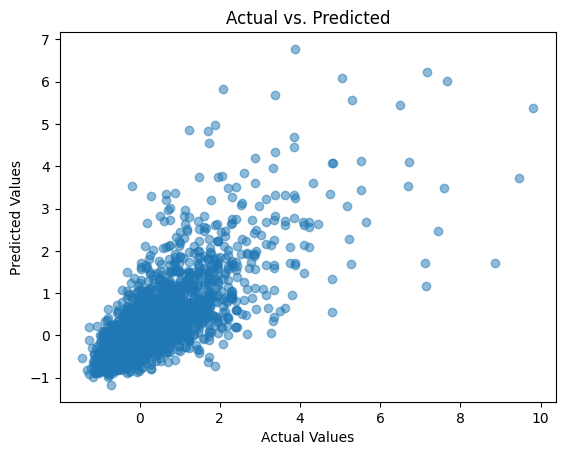

In [66]:
import matplotlib.pyplot as plt

plt.scatter(y_test.detach().numpy(), outputs.detach().numpy(), alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()

*Observations:*

1) Clustered Predictions: Most predictions are concentrated in a narrow range, suggesting the model struggles to generalize for higher actual values.

2) Underestimation: For higher actual values, the model tends to underestimate, as seen by the points below the diagonal line.

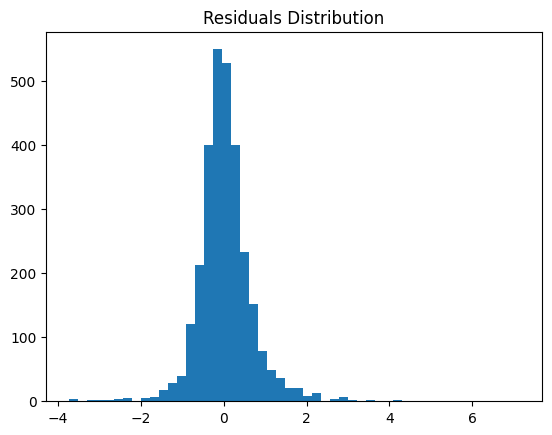

In [67]:
residuals = y_test.detach().numpy() - outputs.detach().numpy()
plt.hist(residuals, bins=50)
plt.title("Residuals Distribution")
plt.show()

*Observations:*

1) Centered Around Zero:

The residuals are mostly centered around 0, which is a good sign as it indicates that the model is not systematically biased (e.g., consistently overestimating or underestimating).

2) Skewness:

There is a slight positive skew, as some residuals extend further to the right (positive values). This suggests that the model tends to underestimate higher actual values.

3) Outliers:

There are a few outliers on both ends of the distribution (e.g., residuals less than -2 or greater than 4). These could indicate cases where the model struggles to predict accurately.

4) Spread:

The residuals are relatively concentrated near zero, but the spread indicates that the model's predictions are not perfectly accurate, especially for certain data points.

In [68]:
# We define different feature attributtion based methods here:
ig = IntegratedGradients(model)
ig_nt = NoiseTunnel(ig)
dl = DeepLift(model)
gs = GradientShap(model)
fa = FeatureAblation(model)

ig_attr_test = ig.attribute(X_test, n_steps=50)
ig_nt_attr_test = ig_nt.attribute(X_test)
dl_attr_test = dl.attribute(X_test)
gs_attr_test = gs.attribute(X_test, X_train)
fa_attr_test = fa.attribute(X_test)

c:\Users\HUAWEI\AppData\Local\Programs\Python\Python312\Lib\site-packages\captum\_utils\gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
c:\Users\HUAWEI\AppData\Local\Programs\Python\Python312\Lib\site-packages\captum\attr\_core\deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


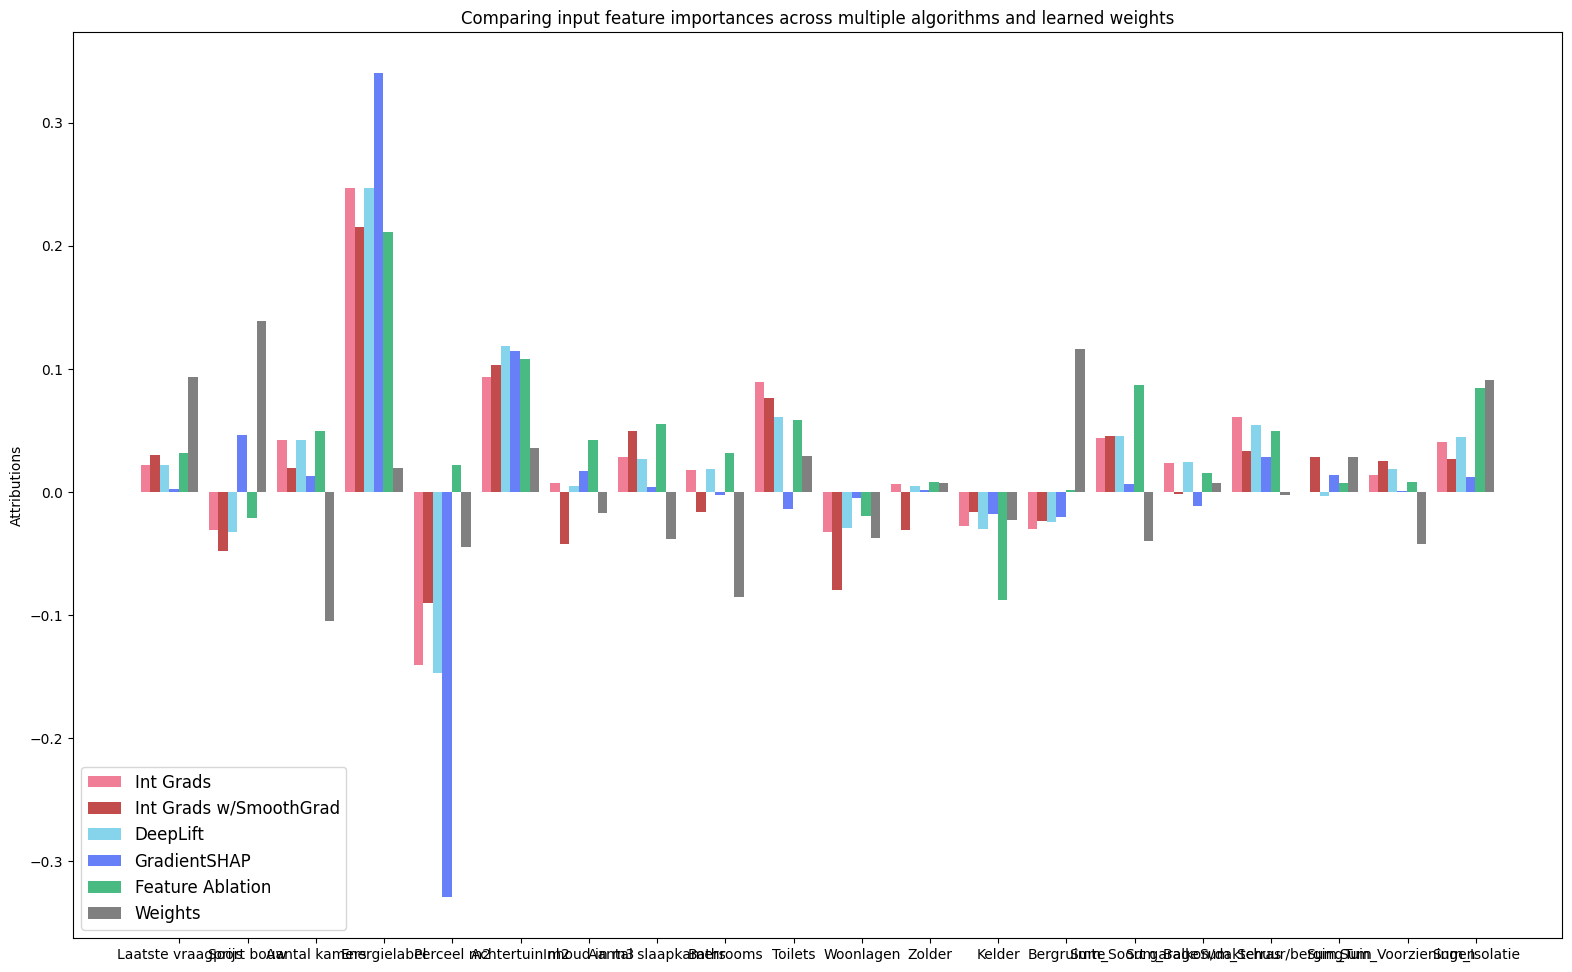

In [71]:
# prepare attributions for visualization

x_axis_data = np.arange(X_test.shape[1])
x_axis_data_labels = list(map(lambda idx: feature_names[idx], x_axis_data))

ig_attr_test_sum = ig_attr_test.detach().numpy().sum(0)
ig_attr_test_norm_sum = ig_attr_test_sum / np.linalg.norm(ig_attr_test_sum, ord=1)

ig_nt_attr_test_sum = ig_nt_attr_test.detach().numpy().sum(0)
ig_nt_attr_test_norm_sum = ig_nt_attr_test_sum / np.linalg.norm(ig_nt_attr_test_sum, ord=1)

dl_attr_test_sum = dl_attr_test.detach().numpy().sum(0)
dl_attr_test_norm_sum = dl_attr_test_sum / np.linalg.norm(dl_attr_test_sum, ord=1)

gs_attr_test_sum = gs_attr_test.detach().numpy().sum(0)
gs_attr_test_norm_sum = gs_attr_test_sum / np.linalg.norm(gs_attr_test_sum, ord=1)

fa_attr_test_sum = fa_attr_test.detach().numpy().sum(0)
fa_attr_test_norm_sum = fa_attr_test_sum / np.linalg.norm(fa_attr_test_sum, ord=1)

lin_weight = model.lin1.weight[0].detach().numpy()
y_axis_lin_weight = lin_weight / np.linalg.norm(lin_weight, ord=1)

width = 0.14
legends = ['Int Grads', 'Int Grads w/SmoothGrad','DeepLift', 'GradientSHAP', 'Feature Ablation', 'Weights']

plt.figure(figsize=(16, 10))

ax = plt.subplot()
ax.set_title('Comparing input feature importances across multiple algorithms and learned weights')
ax.set_ylabel('Attributions')

FONT_SIZE = 16
plt.rc('font', size=FONT_SIZE)            # fontsize of the text sizes
plt.rc('axes', titlesize=FONT_SIZE)       # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)       # fontsize of the x and y labels
plt.rc('legend', fontsize=FONT_SIZE - 4)  # fontsize of the legend

ax.bar(x_axis_data, ig_attr_test_norm_sum, width, align='center', alpha=0.8, color='#eb5e7c')
ax.bar(x_axis_data + width, ig_nt_attr_test_norm_sum, width, align='center', alpha=0.7, color='#A90000')
ax.bar(x_axis_data + 2 * width, dl_attr_test_norm_sum, width, align='center', alpha=0.6, color='#34b8e0')
ax.bar(x_axis_data + 3 * width, gs_attr_test_norm_sum, width, align='center',  alpha=0.8, color='#4260f5')
ax.bar(x_axis_data + 4 * width, fa_attr_test_norm_sum, width, align='center', alpha=1.0, color='#49ba81')
ax.bar(x_axis_data + 5 * width, y_axis_lin_weight, width, align='center', alpha=1.0, color='grey')
ax.autoscale_view()
plt.tight_layout()

ax.set_xticks(x_axis_data + 0.5)
ax.set_xticklabels(x_axis_data_labels)

plt.legend(legends, loc=3)
plt.show()

*Observations:*

1) Consistency Across Methods:

- Some features (e.g., Aantal kamers, Perceel, Aantal slaapkamers) show consistent importance across multiple attribution methods, indicating their strong influence on the model's predictions.

- However, other features (e.g., Achtertuin, Bouwjaar) have varying attributions across methods, suggesting that their importance might be less certain or context-dependent.

2) Dominant Features:

- Features like Laatste vraagprijs and Aantal kamers have high positive or negative attributions across most methods, indicating they are key drivers of the model's predictions.

- The learned weights (grey bars) also highlight these features as significant.

3) Negative Attributions:

- Some features (e.g., Achtertuin, Bouwjaar) have negative attributions, meaning they contribute to reducing the predicted value.

4) Discrepancies:

- There are noticeable discrepancies between the learned weights (grey bars) and the attributions from other methods. This is expected because learned weights reflect the model's linear relationships, while attribution methods capture non-linear interactions.

5) Feature Ablation:

- The Feature Ablation method (green bars) shows some features as more important compared to other methods, likely because it evaluates the impact of removing features entirely.